# Pipeline de visualisation et EDA - `flood.csv`

Ce notebook contient une pipeline d'exploration des données (EDA) et de visualisations pour le fichier `flood.csv`.
Étapes :
- Charger les données
- Vérifier la structure et les valeurs manquantes
- Visualiser la distribution de `FloodProbability`
- Explorer les corrélations entre les variables et `FloodProbability`
- Graphiques détaillés (histogrammes, heatmap, scatter + régression)
- Conclusion et pistes suivantes

In [1]:
# Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Chargement des données
df = pd.read_csv("flood.csv")
print('Taille du dataset :', df.shape)
display(df.head())

# Aperçu des types et valeurs manquantes
print('Info:')
display(df.info())
print('Description numérique:')
display(df.describe().T)

# Comptage des valeurs manquantes
missing = df.isnull().sum()
display(missing[missing>0])

Taille du dataset : (50000, 21)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulne

None

Description numérique:


,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,50000.0,4.99148,2.236834,0.000,3.000,5.0,6.000,16.000
TopographyDrainage,50000.0,4.98410,2.246488,0.000,3.000,5.0,6.000,18.000
RiverManagement,50000.0,5.01594,2.231310,0.000,3.000,5.0,6.000,16.000
Deforestation,50000.0,5.00848,2.222743,0.000,3.000,5.0,6.000,17.000
Urbanization,50000.0,4.98906,2.243159,0.000,3.000,5.0,6.000,17.000
ClimateChange,50000.0,4.98834,2.226761,0.000,3.000,5.0,6.000,17.000
DamsQuality,50000.0,5.01536,2.245000,0.000,3.000,5.0,6.000,16.000
Siltation,50000.0,4.98860,2.232642,0.000,3.000,5.0,6.000,16.000
AgriculturalPractices,50000.0,5.00612,2.234588,0.000,3.000,5.0,6.000,16.000
Encroachments,50000.0,5.00638,2.241633,0.000,3.000,5.0,6.000,18.000


Series([], dtype: int64)

## Visualisations principales
Les graphiques suivants montrent la distribution de la probabilité d'inondation (`FloodProbability`), les distributions des variables explicatives, la matrice de corrélation et des relations directes (scatter + régression) entre les variables les plus corrélées et `FloodProbability`.

In [3]:
# df['predictions_col'] = df['FloodProbability'].apply(lambda x: 1 if x > 0.5 else 0)

# labels = {0: 'Negative', 1: 'Positive'}
# df['predictions_col'].value_counts().plot(
#     kind='pie',
#     autopct='%1.0f%%',
#     shadow=True,
#     explode=[0.02, 0.02],
#     startangle=90,
#     legend=True,
#     title='Flood Predictions',
#     ylabel='',
#     colors=['blue', 'green'],
#     labels=[labels[i] for i in df['predictions_col'].value_counts().index]
# )
# plt.show()

In [4]:
# Distribution de FloodProbability (Plotly interactif)
fig = px.histogram(df, x='FloodProbability', nbins=50, title='Distribution de FloodProbability')
fig.update_layout(bargap=0.05)
fig.show()

# Colonnes numériques disponibles
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
print('Colonnes numériques (excluant FloodProbability):', num_cols)


Colonnes numériques (excluant FloodProbability): ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']


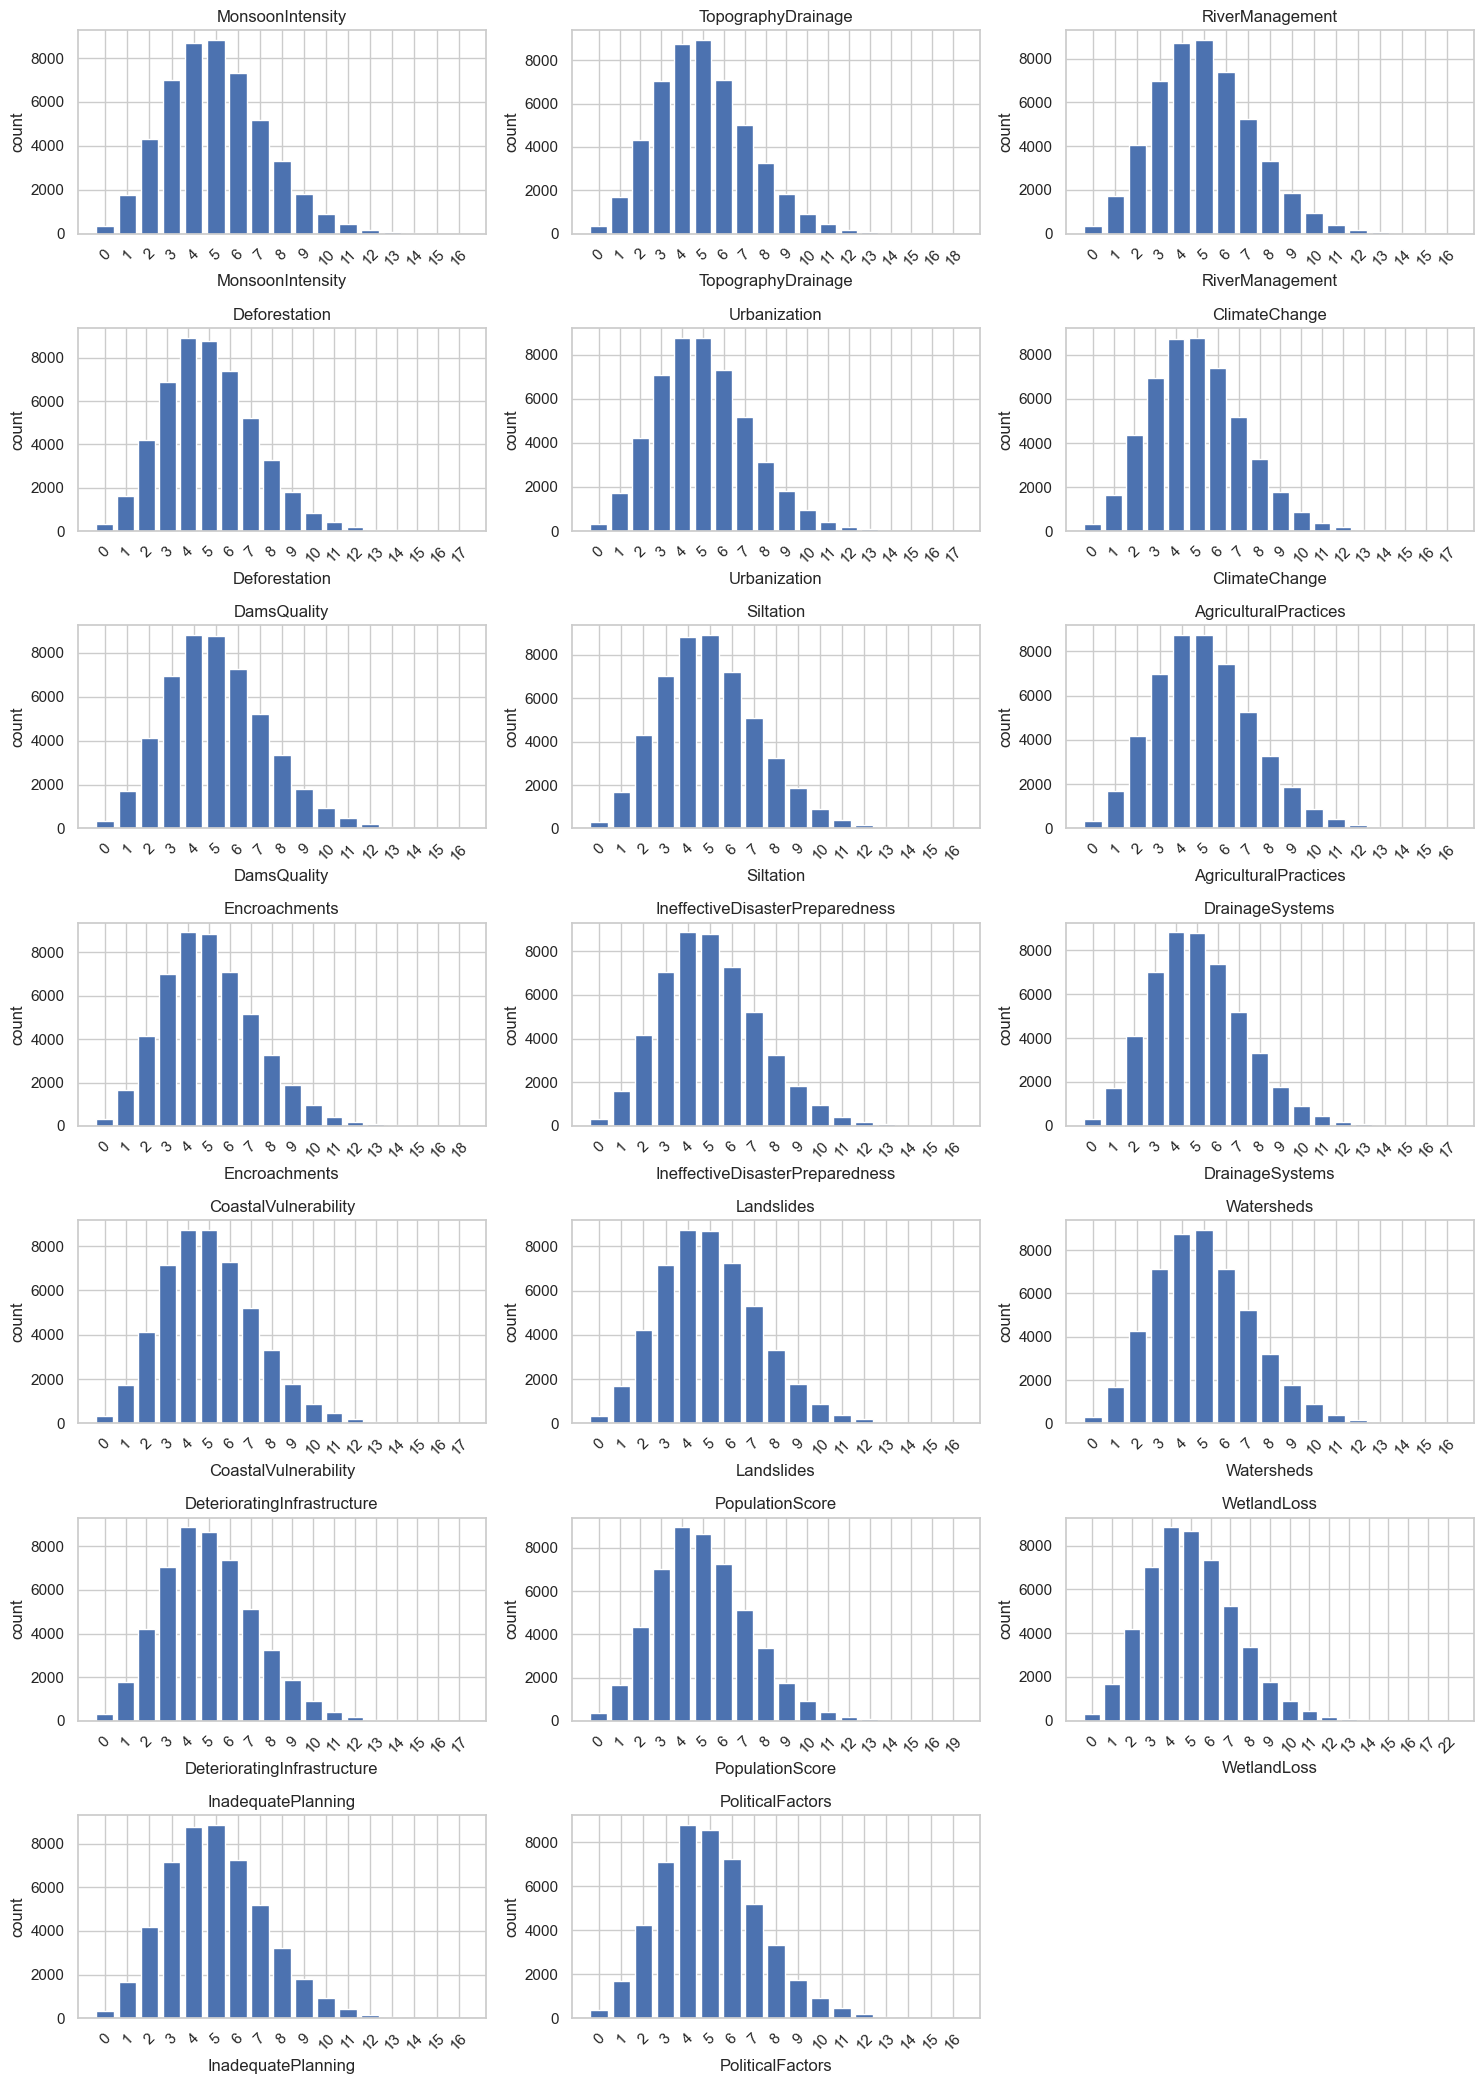

In [5]:
# Histogrammes pour toutes les variables numériques
num_cols_all = num_cols.copy()
n = len(num_cols_all)
import math
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()
for i, col in enumerate(num_cols_all):
    ax = axes[i]
    values = df[col].dropna()
    nunique = values.nunique()
    # Pour variables discrètes (peu de valeurs uniques) : bar plot sur value_counts
    if (pd.api.types.is_integer_dtype(values) and nunique <= 30) or nunique <= 20:
        vc = values.value_counts().sort_index()
        ax.bar(vc.index.astype(str), vc.values, color='C0')
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        ax.tick_params(axis='x', rotation=45)
    else:
        sns.histplot(values, ax=ax, kde=False, color='C0', bins=30)
        ax.set_xlabel(col)
    ax.set_title(col)
# Supprimer les axes inutilisés
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()

### Diagnostic des distributions et heatmap des fréquences normalisées
Les graphiques précédents montraient des histogrammes similaires car les variables sont des scores entiers sur des plages proches.
Cette cellule calcule un résumé chiffré (min/max/moyenne/std/nunique), affiche les `value_counts` des premières variables et construit une heatmap des fréquences normalisées par valeur
pour mieux visualiser les différences entre colonnes. Enfin, elle affiche la distribution de `FloodProbability` et la corrélation des variables avec la cible.

,min,max,mean,std,nunique
MonsoonIntensity,0,16,4.99148,2.236834,17
Watersheds,0,16,4.97982,2.232190,17
Landslides,0,16,4.98422,2.227741,17
IneffectiveDisasterPreparedness,0,16,5.00502,2.226076,17
InadequatePlanning,0,16,4.99436,2.230011,17
AgriculturalPractices,0,16,5.00612,2.234588,17
Siltation,0,16,4.98860,2.232642,17
PoliticalFactors,0,16,4.99052,2.246075,17
RiverManagement,0,16,5.01594,2.231310,17
DamsQuality,0,16,5.01536,2.245000,17


--- MonsoonIntensity (nunique=17) ---


MonsoonIntensity
0      332
1     1736
2     4295
3     6978
4     8681
5     8818
6     7322
7     5163
8     3295
9     1809
10     885
11     436
12     148
13      74
14      21
15       4
16       3
Name: count, dtype: int64

--- TopographyDrainage (nunique=18) ---


TopographyDrainage
0      333
1     1711
2     4325
3     7065
4     8776
5     8936
6     7106
7     5013
8     3247
9     1851
10     926
11     439
12     171
13      69
14      22
15       5
16       4
18       1
Name: count, dtype: int64

--- RiverManagement (nunique=17) ---


RiverManagement
0      335
1     1698
2     4065
3     6971
4     8730
5     8845
6     7385
7     5251
8     3296
9     1836
10     927
11     401
12     164
13      61
14      19
15      12
16       4
Name: count, dtype: int64

--- Deforestation (nunique=18) ---


Deforestation
0      328
1     1596
2     4191
3     6904
4     8943
5     8775
6     7398
7     5221
8     3298
9     1812
10     852
11     411
12     166
13      63
14      28
15       9
16       4
17       1
Name: count, dtype: int64

--- Urbanization (nunique=18) ---


Urbanization
0      331
1     1745
2     4213
3     7083
4     8749
5     8791
6     7336
7     5195
8     3113
9     1819
10     938
11     390
12     178
13      78
14      19
15      15
16       4
17       3
Name: count, dtype: int64

--- ClimateChange (nunique=18) ---


ClimateChange
0      326
1     1654
2     4368
3     6961
4     8733
5     8794
6     7403
7     5183
8     3257
9     1796
10     878
11     375
12     172
13      62
14      26
15       9
16       2
17       1
Name: count, dtype: int64

/var/folders/rn/5sc5vrvn6yl8jbwyfj4_51f40000gn/T/ipykernel_59604/1061991094.py:32: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



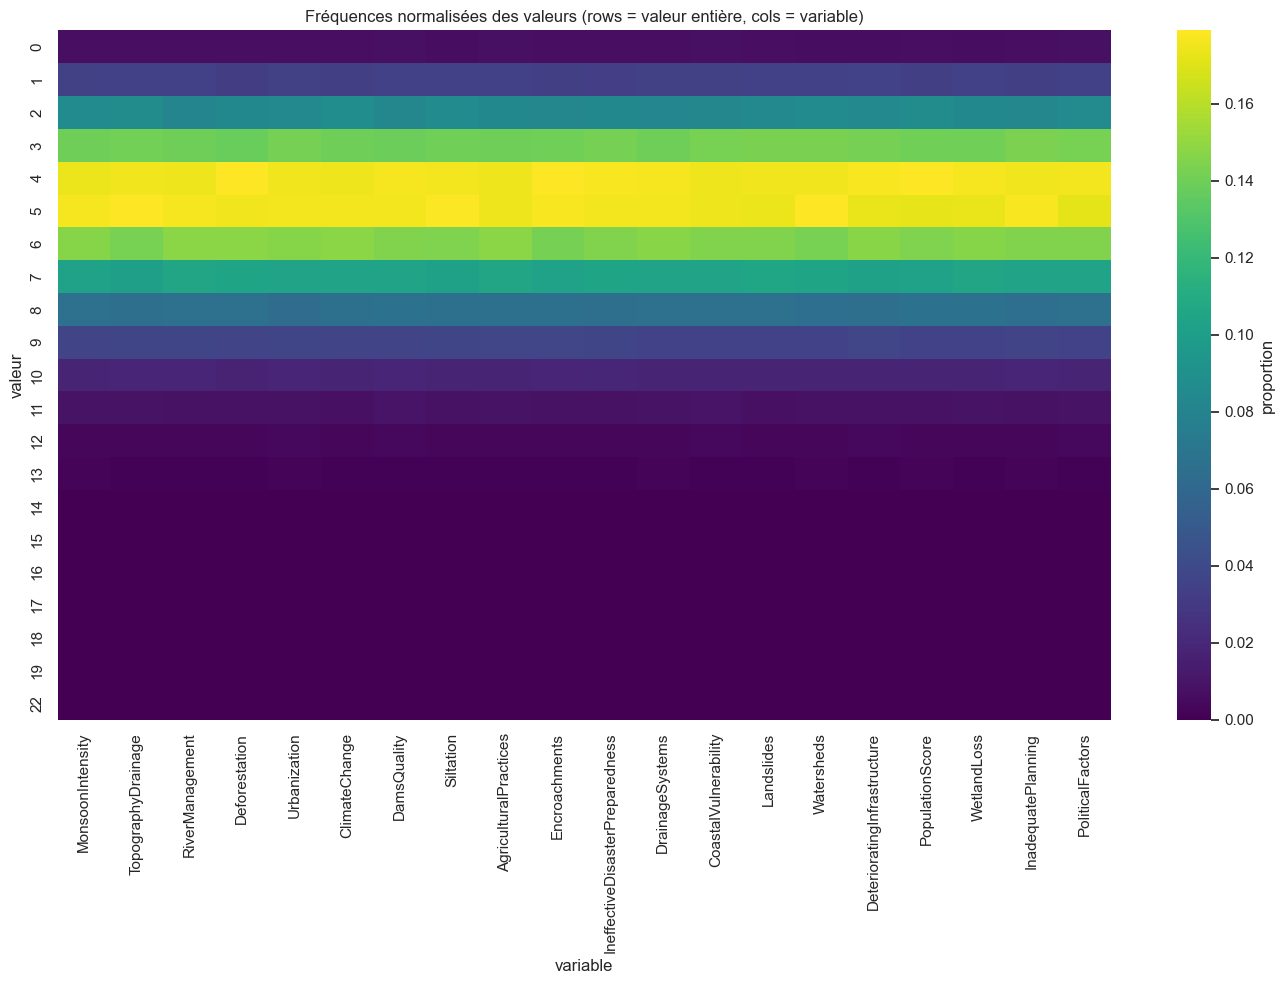

In [6]:
# Diagnostic des distributions et visualisations utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='whitegrid')

summary = pd.DataFrame({
    'min': df[num_cols].min(),
    'max': df[num_cols].max(),
    'mean': df[num_cols].mean(),
    'std': df[num_cols].std(),
    'nunique': df[num_cols].nunique()
})
display(summary.sort_values('nunique'))

# Afficher value_counts des 6 premières variables pour voir les modes
for col in num_cols[:6]:
    print(f"--- {col} (nunique={df[col].nunique()}) ---")
    display(df[col].value_counts().sort_index().head(30))

# Heatmap des fréquences normalisées par valeur (rows = valeurs, cols = variables)
freqs = {}
all_values = set()
for col in num_cols:
    vc = df[col].value_counts().sort_index()
    freqs[col] = vc
    all_values.update(vc.index.tolist())
all_values = sorted(all_values)

freq_df = pd.DataFrame(index=all_values, columns=num_cols).fillna(0).astype(float)
for col in num_cols:
    vc = freqs[col]
    for v, c in vc.items():
        freq_df.at[v, col] = c
# Normaliser par colonne (proportion)
freq_norm = freq_df.div(freq_df.sum(axis=0).replace(0, 1), axis=1)

plt.figure(figsize=(14, max(4, int(len(all_values)/2))))
sns.heatmap(freq_norm, cmap='viridis', cbar_kws={'label':'proportion'})
plt.ylabel('valeur')
plt.xlabel('variable')
plt.title('Fréquences normalisées des valeurs (rows = valeur entière, cols = variable)')
plt.tight_layout()
plt.show()

,pearson_abs,spearman_abs
AgriculturalPractices,0.221846,0.212878
ClimateChange,0.220986,0.209701
CoastalVulnerability,0.215187,0.207764
DamsQuality,0.227467,0.216437
Deforestation,0.220237,0.213954
DeterioratingInfrastructure,0.229444,0.217295
DrainageSystems,0.217895,0.205360
Encroachments,0.218259,0.207604
FloodProbability,1.000000,1.000000
InadequatePlanning,0.223329,0.213484


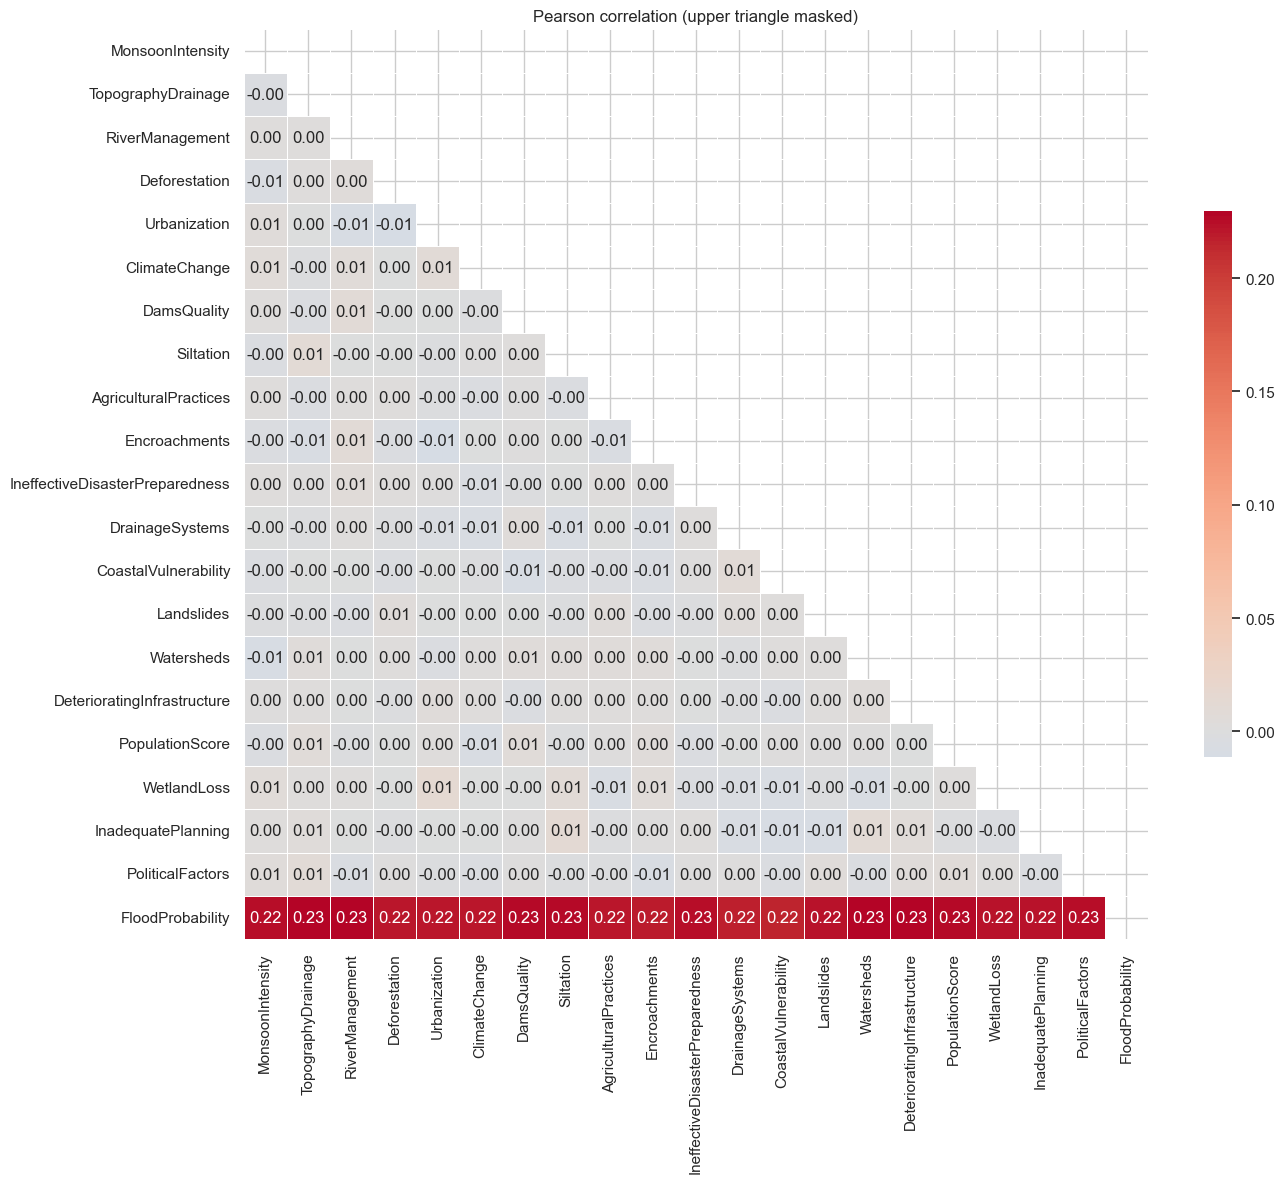

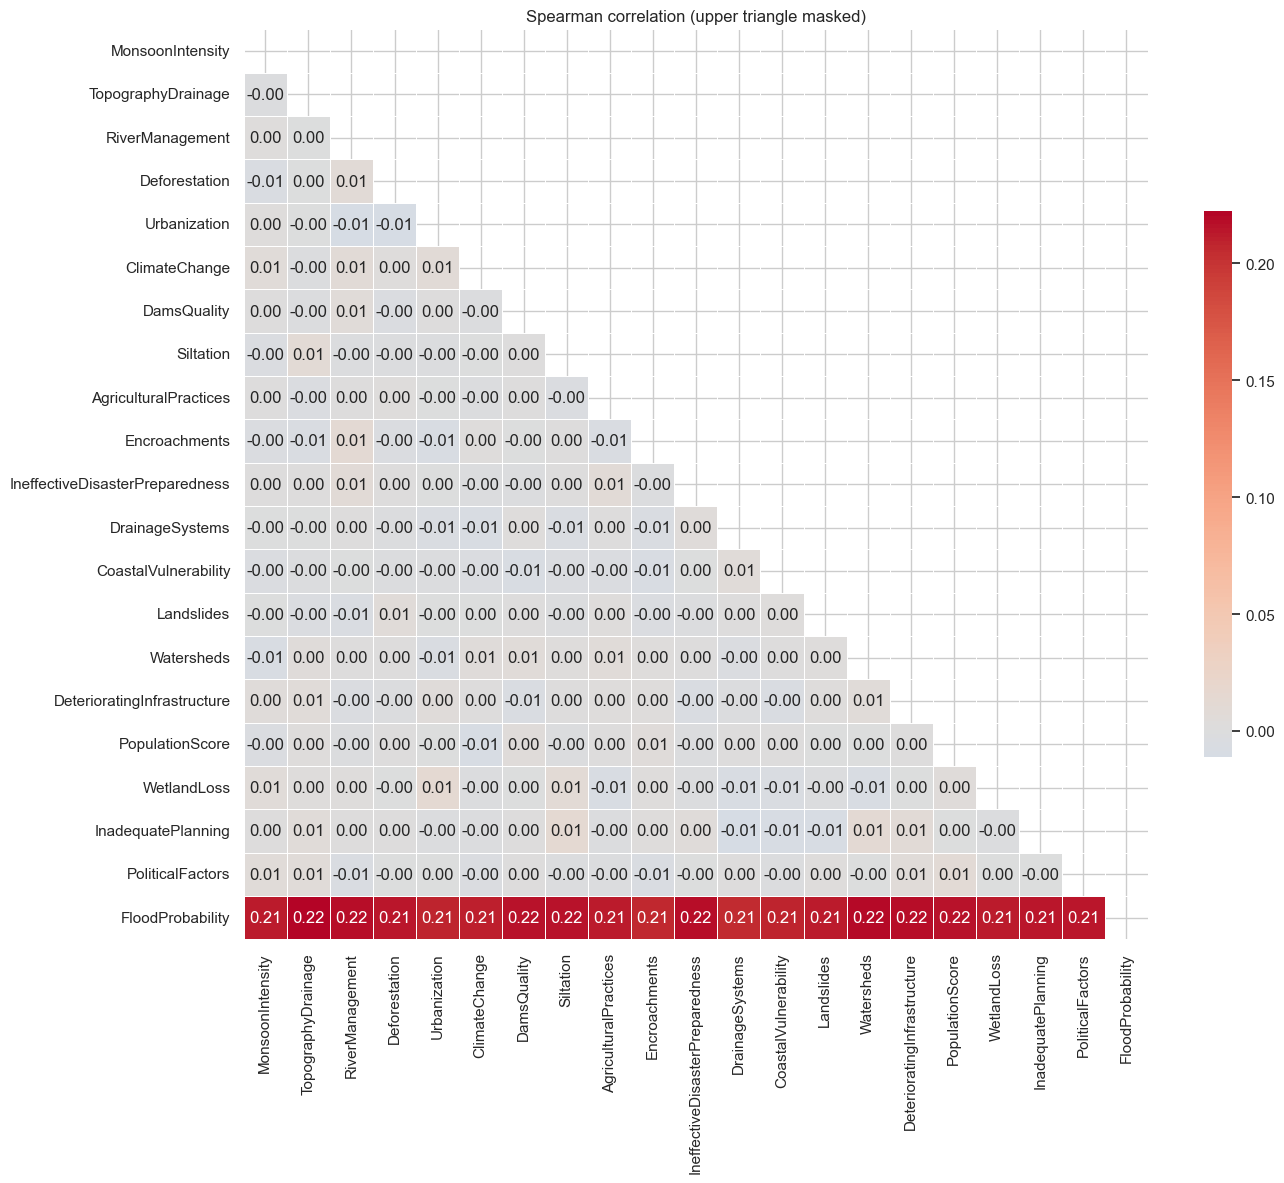

/var/folders/rn/5sc5vrvn6yl8jbwyfj4_51f40000gn/T/ipykernel_59604/2230703444.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




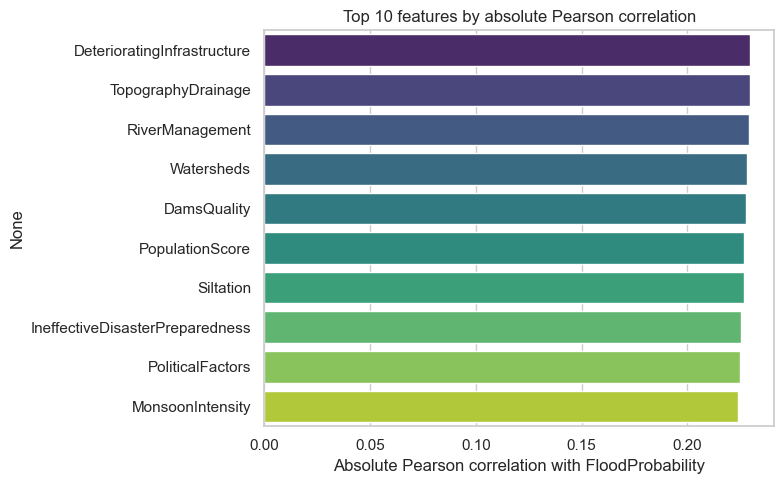

In [7]:
# Matrice de corrélation améliorée : Pearson et Spearman (ignorer colonnes constantes)
import numpy as np
# Sélection des colonnes numériques et conversion en float
num_df = df.select_dtypes(include=[np.number]).astype(float)
# Supprimer colonnes à variance nulle (sinon corr produit NaN)
std = num_df.std()
cols = std[std > 0].index.tolist()
num_df = num_df[cols].copy()

# Calculer Pearson et Spearman
pearson = num_df.corr(method='pearson')
spearman = num_df.corr(method='spearman')

# Corrélations absolues de la cible triées
target_corr_pearson = pearson['FloodProbability'].abs().sort_values(ascending=False)
target_corr_spearman = spearman['FloodProbability'].abs().sort_values(ascending=False)
display(pd.DataFrame({'pearson_abs': target_corr_pearson, 'spearman_abs': target_corr_spearman}))

# Heatmap (masque la moitié supérieure) pour Pearson avec annotations
mask = np.triu(np.ones_like(pearson, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(pearson, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .6})
plt.title('Pearson correlation (upper triangle masked)')
plt.tight_layout()
plt.show()

# Heatmap pour Spearman (ordre monotone) - utile si données ordinales
mask = np.triu(np.ones_like(spearman, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(spearman, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .6})
plt.title('Spearman correlation (upper triangle masked)')
plt.tight_layout()
plt.show()

# Barplot des top 10 features par corrélation absolue (Pearson) avec la cible
top = target_corr_pearson.drop('FloodProbability').head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.xlabel('Absolute Pearson correlation with FloodProbability')
plt.title('Top 10 features by absolute Pearson correlation')
plt.tight_layout()
plt.show()

## Conclusion rapide et prochaines étapes
- `FloodProbability` est une variable continue entre ~0.35 et ~0.63 (selon l'échantillon).
- Le heatmap et `target_corr` montrent quelles variables sont les plus liées à la probabilité d'inondation — ce sont de bonnes candidates pour un modèle prédictif ou pour interprétation.
- Prochaines étapes recommandées :
  - Nettoyage plus fin (gestion des outliers, imputation si besoin).
  - Normalisation / standardisation si vous entraînez un modèle.
  - Essayer un modèle simple (ex: régression linéaire ou arbre) pour évaluer l'importance des variables.
  - Visualisations supplémentaires par segments (ex: clustering, classes binaires de la probabilité).

Souhaitez-vous que j'exécute ce notebook pour vérifier qu'il tourne correctement dans votre environnement?